# 线性模型 Linear Model

<!-- TODO Linear model -->

1。线性模型, 是统计学习和机器学习的基础。

线性模型的形式很简单，$Y=X\cdot W^{T} + b$。 
对于**分类任务**，就是选择合适的$W$和$b$,使得数据集中的数据分别位于分界（超）平面的两侧；
对于**回归任务**，找到合适的$W$和$b$,使得数据集中的数据尽量位于回归面的附近。

### 最小二乘法（ordinary least square）

为了计算方便，把$b$吸收到W中，作为$x^{0}$的系数，相应的在X中添加对应的列。m为特征个数，n为样本数量。
$$y^{(i)}=\sum_{j=0}^{m}X_{ij}w_{j}, i=(1,2,...,n)$$
向量化可有等式：
$$\vec{y}=X\cdot\vec{w}$$
其中
$X=\begin{bmatrix}
X_{11} & X_{12} &\cdots&X_{1m} \\ 
X_{21} & X_{22} &\cdots&X_{2m} \\ 
 \vdots&\vdots  & \ddots&\vdots\\
X_{n1} & X_{n2} &\cdots&X_{nm}
\end{bmatrix}$,
$\vec{w}=\begin{pmatrix}
w_1\\
w_2\\
\vdots\\
w_n
\end{pmatrix}$,
$\vec{y}=\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n\\
\end{pmatrix}$

>注：$\frac{\partial{\vec{y}}}{\partial{\vec{x}}}=\frac{\partial{X\vec{x}}}{\partial{\vec{x}}}=\begin{bmatrix}
X_{11} & X_{21} &\cdots&X_{n1} \\ 
X_{12} & X_{22} &\cdots&X_{n2} \\ 
 \vdots&\vdots  & \ddots&\vdots\\
X_{1m} & X_{2m} &\cdots&X_{nm}
\end{bmatrix}
=X^{T}$ 

$$\frac{\partial{A\vec{x}}}{\partial{\vec{x}}}=A^{T}$$   
$$\frac{\partial{A\vec{x}}}{\partial{\vec{x}^{T}}}=A$$   
$$\frac{\partial({\vec{x}A})}{\partial{\vec{x}}}=A$$

### 线性回归 Linear Regression

首先构造数据集（x,y），$$y = a*x + b+ \epsilon$$
其中$\epsilon$ (np.random.randn((m,n)))为随机扰动项，来模拟现实数据中的各种加行扰动。

In [1]:
import numpy as np
np.random.seed(24) # for reproduction
a = 5
b = 1 
x = np.linspace(0,2,100)
epsilon = np.random.randn(len(x))
y = a*x + b + epsilon

#### 理论计算(极大似然估计）：
从贝叶斯角度讲，加入模型参数的先验分布。
首先是考虑一维情况：
假设$\epsilon^{i}$为I.I.D.的Guassian分布，均值为0， 方差为$\delta^{2}$。即：$$p(\epsilon^{i})=\frac{1}{\sqrt{2\pi}\delta}exp(-\frac{(\epsilon^{(i)})^{2}}{2\delta^{2}})$$
对于第i个数据$ y^{(i)}= W^{T}\cdot{x^{(i)}}+ \epsilon^{(i)}$的条件概率$p(y^{(i)}|x^{(i)};\theta)$为
$$p(y^{(i)}|x^{(i)};\theta) = \frac{1}{\sqrt{2\pi}\delta}exp(-\frac{(y^{(i)}-W^{T}\cdot x^{(i)})^{2}}{2\delta^{2}})$$
应用拉格朗日乘子来计算$W$的似然估计:
$$L(w) =\prod_{i=1}^{m} p(y^{(i)}|x^{(i)};\theta) = \prod_{i=1}^{m} \frac{1}{\sqrt{2\pi}\delta}exp(-\frac{(y^{(i)}-W^{T}\cdot x^{(i)})^{2}}{2\delta^{2}})$$
取其对数$l(w) = ln(L(w))$， 则有$$l(w) = -m log(\sqrt{2\pi}\delta) - \frac{1}{2\delta^{2}}\sum_{i=1}^{m}(y^{(i)}-W^{T}x^{(i)})^{2}$$
去除常数项和系数，可令：
$$J(w) = \sum_{i=1}^{m}(y^{(i)}-W^{T}x^{(i)})^{2}$$

根据极大似然估计，最优解$w^{*}=\underset{w}{\text{arg min}}J(w)$

$J(w)$是简单的凸函数，其最优解必为梯度为0的点，由
$\triangledown_{w}J(w)=X^{T}XW-X^{T}Y=0$可得
$$W = (X^{T}X)^{-1}X^{T}Y$$

>注：矩阵取逆的复杂度为$O(n^{2.4})$~$O(n^{3})$之间

In [2]:
X_b = np.c_[np.ones((len(x),1)),x] # np.c_[] not np.c_(）

In [3]:
w_star = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(w_star)

[ 1.17970383  4.92454819]


计算结果，最佳估计参数 $b=1.18, a = 4.92$

对比numpy中的多项式拟合np.ployfit()，两者结果相同（p中高次项在前）。

In [4]:
p,_=np.polyfit(x,y,1,cov=True) 
p[::-1]

array([ 1.17970383,  4.92454819])

点到直线距离：
$$ d= \frac{|Ax+By+C|}{\sqrt{A^{2}+B^{2}}}$$

In [5]:
d = w_star[1]*x - y + w_star[0]  # regardless of real distance, just for max value postion
postion = [np.where(d==d.min())[0],np.where(d==d.max())[0]]
line_max = [w_star[1]*x+y[i]-w_star[1]*x[i] for i in postion]
# y_lp = w_star[1]*x+y_p-w_star[1]*x_p
# y_ln = w_star[1]*x+y_n-w_star[1]*x_n

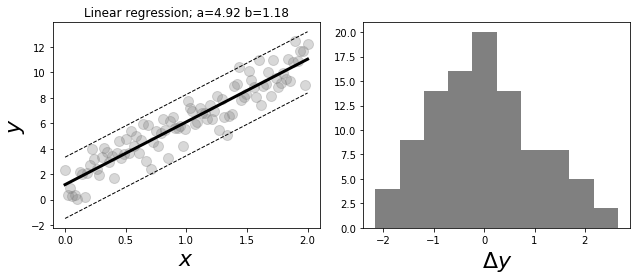

In [8]:
%matplotlib inline
from matplotlib.pylab import subplots

# predict
y_ = w_star[1]*x + w_star[0]

fig,axs=subplots(1,2)
fig.set_size_inches((9,4))
_=ax =axs[0]
_=ax.plot(x,y,'o',alpha=.3,color='gray',ms=10)
_=ax.plot(x,y_,color='k',lw=3)
# _=ax.plot(x,y_lp, '--',color='k', lw=1)
# _=ax.plot(x,y_ln, '--',color='k', lw=1)
_=ax.plot(x,line_max[0], '--',color='k', lw=1)
_=ax.plot(x,line_max[1], '--',color='k', lw=1)
_=ax.set_xlabel("$x$",fontsize=22)
_=ax.set_ylabel("$y$",fontsize=22)
_=ax.set_title("Linear regression; a=%3.3g b=%3.3g"%(p[0],p[1]))
_=ax = axs[1]
_=ax.hist(y_-y,color='gray')
_=ax.set_xlabel(r"$\Delta y$",fontsize=22)
fig.tight_layout()

### 多项式回归

多项式回归是线性回归的更复杂，更泛化的模型。理论上讲，可以构建一个任意多阶的函数来完全拟合任意多的数据。
如：指数函数 $e^{x} = \sum^{\infty}_{n=0}\frac{x^{n}}{n!}$, Fourier transform。

<!-- TODO in Regularization -->
- [ ] 维度灾难 -> 奥卡姆剃刀 -> 正则化

L0:  NP Hard $\sum_{i=1}^{m}(\theta x^{(i)}-y^{(i)})^{2} +\sum_{i=1}^{m}count(\theta_{i}\neq 0)$

L1: Lasso : Tibshirani, 1996 

$J(\overrightarrow{\theta})_{L1} = \frac{1}{2}\sum_{i=1}^{m}(h_{\overrightarrow{\theta}}(x^{(i)}-y^{(i)})^{2}+\lambda\sum_{j=1}^{n}|\theta_{j}|$

L2: Ridge Hoerl, Kennard, 1970 

$J(\overrightarrow{\theta})_{L2} = \frac{1}{2}\sum_{i=1}^{m}(h_{\overrightarrow{\theta}}(x^{(i)}-y^{(i)})^{2}+\lambda\sum_{j=1}^{n}\theta_{j}^{2}$

Elastic Net

$J(\overrightarrow{\theta})_{L2} = \frac{1}{2}\sum_{i=1}^{m}(h_{\overrightarrow{\theta}}(x^{(i)}-y^{(i)})^{2}+\lambda(\rho\cdot\sum_{j=1}^{n}|\theta_{j}|+(1-\rho)\cdot\sum_{j=1}^{n}\theta_{j}^{2})$

note: $\lambda>0$, $\rho\in[0,1]$

生成模拟数据集（x,y)

In [25]:
m = 100 # numbers of data
epsilon = np.random.randn(2*m)
x = np.linspace(-3, 3, m) + epsilon[:m]
x = np.sort(x)
y = x**2 - 2*x - 5 + epsilon[m:] # not epsilong[m+1:,:]
x.shape = -1, 1
y.shape = -1, 1
# print(x.shape, y.shape)

In [46]:
from sklearn.preprocessing import PolynomialFeatures # sklearn.__version__: 0.19.0
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 2nd-degree polynomial
x_poly = poly_features.fit_transform(x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_
x_poly = poly_features.transform(x)
y_quad_pred = lin_reg.predict(x_poly)
lin_reg.coef_

array([[-2.02373874,  0.96420612]])

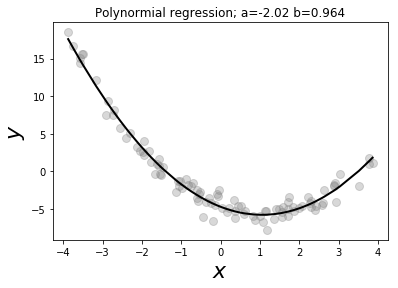

In [47]:
fig,ax=subplots()
_=ax.plot(x,y,'o',alpha=.3,color='gray',ms=8)
_=ax.plot(x,y_quad_pred,color='k',lw=2)
_=ax.set_xlabel("$x$",fontsize=22)
_=ax.set_ylabel("$y$",fontsize=22)
_=ax.set_title("Polynormial regression; a=%3.3g b=%3.3g"%(lin_reg.coef_[0,0],lin_reg.coef_[0,1]))

### Logistic 回归 （Logisctic Regression）

** Bernoulli distribution **
($Y \in \lbrace 0,1 \rbrace$)
$$
\mathbb{P}(Y) = p^Y (1-p)^{ 1-Y }
$$
假定：
$$
\begin{equation}
\hat{p} = \theta(a x+b)= \frac{e^{a x + b}}{1+e^{a x + b}}
\label{eq:prob} \tag{1}
\end{equation}
$$

<!-- TODO Generalized linear model -->
- [ ] 指数族分布和广义线性模型

Logistic/Sigmoid 函数
sigmoid 函数$g(z)=1/(1+e^{-z})$ 这个函数的一个性质是: $$ {g}'(z)=g(z)(1-g(z)) $$

1.appropriate model
2.trianing algorithm
3.a good set of hyperparameters

**线性分类在SVM中**